# BIOMASS ENERGY CONSUMPTION FORECASTING

## Loading All the required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Read the Dataset

In [4]:
# Laod and read the dataset
Biomass_new = pd.read_excel('use_renew_sector.xlsx',sheet_name='Biomass', header=1, index_col=0)

In [6]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Biomass_new.columns = Biomass_new.iloc[0]
Biomass = Biomass_new[1:-1]
# Print the file 
print(Biomass)

State/Year   1960   1961   1962   1963   1964   1965    1966    1967    1968  \
AK           3681   4145   4246   4383   4728   4863    5035    4671    4705   
AL          45681  46171  45959  45764  46341  47641   49102   49050   52920   
AR          37433  36290  36441  36729  36860  35134   35169   33309   33739   
AZ           4013   3837   3672   4028   4089   3695    3679    4180    4147   
CA          82098  83506  86898  93022  98436  97488  100673  101885  110274   
CO           6479   6563   6420   6571   6816   6569    6982    7223    7434   
CT          12842  13169  12825  13339  13886  13541   13612   13964   14931   
DC            123    105    105    105     88     88      88      88     105   
DE           4982   5101   5134   5356   5510   5577    5852    5783    6591   
FL          32690  31611  33321  35838  35983  36798   39739   41567   47044   
GA          71206  70216  69729  72407  73208  74215   74664   70831   73637   
HI              0      0      0    206  

### Load the state abbrevation and divide the years to 6 decades.

In [9]:
# The state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}
# Select the columns for all time periods
Biomass_1960_1970 = Biomass.loc[:, '1960':'1970']
Biomass_1970_1980 = Biomass.loc[:, '1971':'1980']
Biomass_1980_1990 = Biomass.loc[:, '1981':'1990']
Biomass_1990_2000 = Biomass.loc[:, '1991':'2000']
Biomass_2000_2010 = Biomass.loc[:, '2001':'2010']
Biomass_2010_2020 = Biomass.loc[:, '2011':'2020']
# Calculate the average for each state over the specified years
average_1960_1970 = Biomass_1960_1970.mean(axis=1)
average_1970_1980 = Biomass_1970_1980.mean(axis=1)
average_1980_1990 = Biomass_1980_1990.mean(axis=1)
average_1990_2000 = Biomass_1990_2000.mean(axis=1)
average_2000_2010 = Biomass_2000_2010.mean(axis=1)
average_2010_2020 = Biomass_2010_2020.mean(axis=1)

### Print all states with its average for every 10 years for 6 decades

In [11]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]
for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)
    # Year Range for 10 decade
    print(f"\nAverage of all states from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


Average of all states from 1960 to 1970:
State: Alaska - Value: 4579.91
State: Alabama - Value: 48577.45
State: Arkansas - Value: 35460.55
State: Arizona - Value: 4006.18
State: California - Value: 98852.0
State: Colorado - Value: 7021.09
State: Connecticut - Value: 13928.0
State: District of Columbia - Value: 100.45
State: Delaware - Value: 5816.36
State: Florida - Value: 39199.27
State: Georgia - Value: 72287.27
State: Hawaii - Value: 258.18
State: Iowa - Value: 5948.64
State: Idaho - Value: 10754.18
State: Illinois - Value: 34439.27
State: Indiana - Value: 23109.18
State: Kansas - Value: 3499.0
State: Kentucky - Value: 22529.0
State: Louisiana - Value: 39112.36
State: Massachusetts - Value: 49036.73
State: Maryland - Value: 27398.36
State: Maine - Value: 30303.55
State: Michigan - Value: 36663.09
State: Minnesota - Value: 23727.0
State: Missouri - Value: 27800.91
State: Mississippi - Value: 38890.55
State: Montana - Value: 7475.0
State: North Carolina - Value: 68835.0
State: North 

## Average the state into 5 clusters

### Average for 1960 to 1970 and dividing it into 5 clusters

In [14]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1960 to 1970 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    # Sort states within the cluster
    cluster_states = cluster_states.sort_values(by='1960-1970')  
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Biomass_1960_1970.csv', index=True)

All the states from 1960 to 1970 after clustering:

States in Cluster 0:
State: DC - Value: 100.45
State: HI - Value: 258.18
State: ND - Value: 379.27
State: NV - Value: 933.64
State: SD - Value: 1242.64
State: WY - Value: 1513.09
State: UT - Value: 2118.91
State: NE - Value: 2177.27
State: KS - Value: 3499.0
State: RI - Value: 3706.18
State: AZ - Value: 4006.18
State: AK - Value: 4579.91
State: NM - Value: 5719.73
State: DE - Value: 5816.36
State: IA - Value: 5948.64
State: VT - Value: 6916.27
State: CO - Value: 7021.09
State: MT - Value: 7475.0
State: OK - Value: 8143.55
State: ID - Value: 10754.18
State: NH - Value: 11521.36
State: WV - Value: 12081.55
State: CT - Value: 13928.0
Cluster 0 Range: 100.45 - 13928.00

States in Cluster 1:
State: KY - Value: 22529.0
State: IN - Value: 23109.18
State: MN - Value: 23727.0
State: NJ - Value: 24632.45
State: MD - Value: 27398.36
State: MO - Value: 27800.91
State: ME - Value: 30303.55
Cluster 1 Range: 22529.00 - 30303.55

States in Cluster 2:

### Plot all the cluters into map using Tablaue

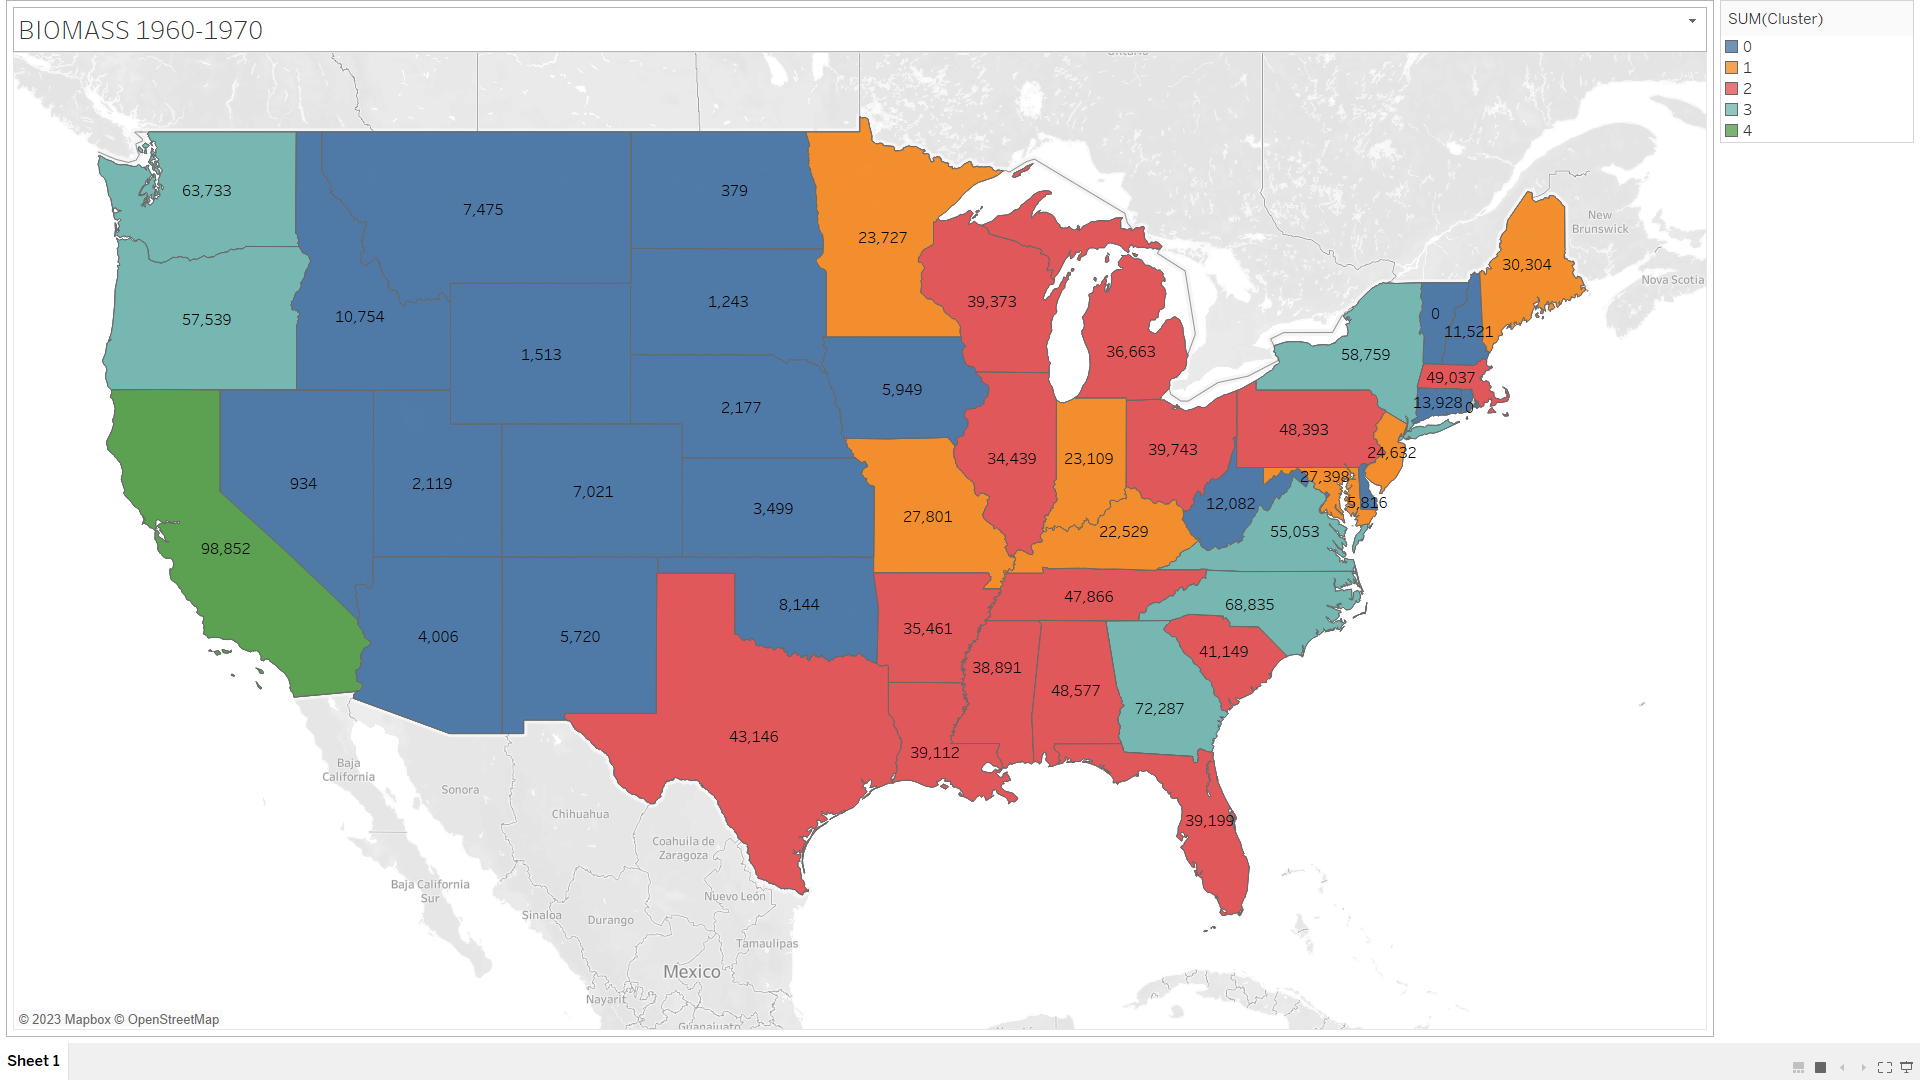

### Average for 1970 to 1980 and dividing it into 5 clusters

In [20]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1970 to 1980 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980')  
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Biomass_1970-1980.csv', index=True)


All the states from 1970 to 1980 after clustering:

States in Cluster 0:
State: DC - Value: 411.1
State: ND - Value: 656.9
State: NV - Value: 1478.3
State: HI - Value: 1627.3
State: SD - Value: 1722.7
State: WY - Value: 1944.6
State: NE - Value: 3244.6
State: UT - Value: 3488.0
State: AK - Value: 5101.2
State: RI - Value: 5459.1
State: NM - Value: 5810.1
State: KS - Value: 6480.4
State: AZ - Value: 6998.8
State: MT - Value: 8131.5
State: DE - Value: 8234.9
State: VT - Value: 8751.4
State: CO - Value: 11319.3
State: IA - Value: 12179.3
State: OK - Value: 13447.1
State: ID - Value: 13508.0
State: WV - Value: 13689.2
State: NH - Value: 16033.6
State: CT - Value: 21343.6
Cluster 0 Range: 411.10 - 21343.60

States in Cluster 1:
State: MO - Value: 29610.2
State: KY - Value: 31169.8
State: MN - Value: 31696.7
State: IN - Value: 33720.8
State: MS - Value: 34413.1
State: MD - Value: 35006.7
State: NJ - Value: 38393.5
State: AR - Value: 42431.0
State: ME - Value: 42965.0
State: SC - Value: 45130

###  Mapping using Tablaue

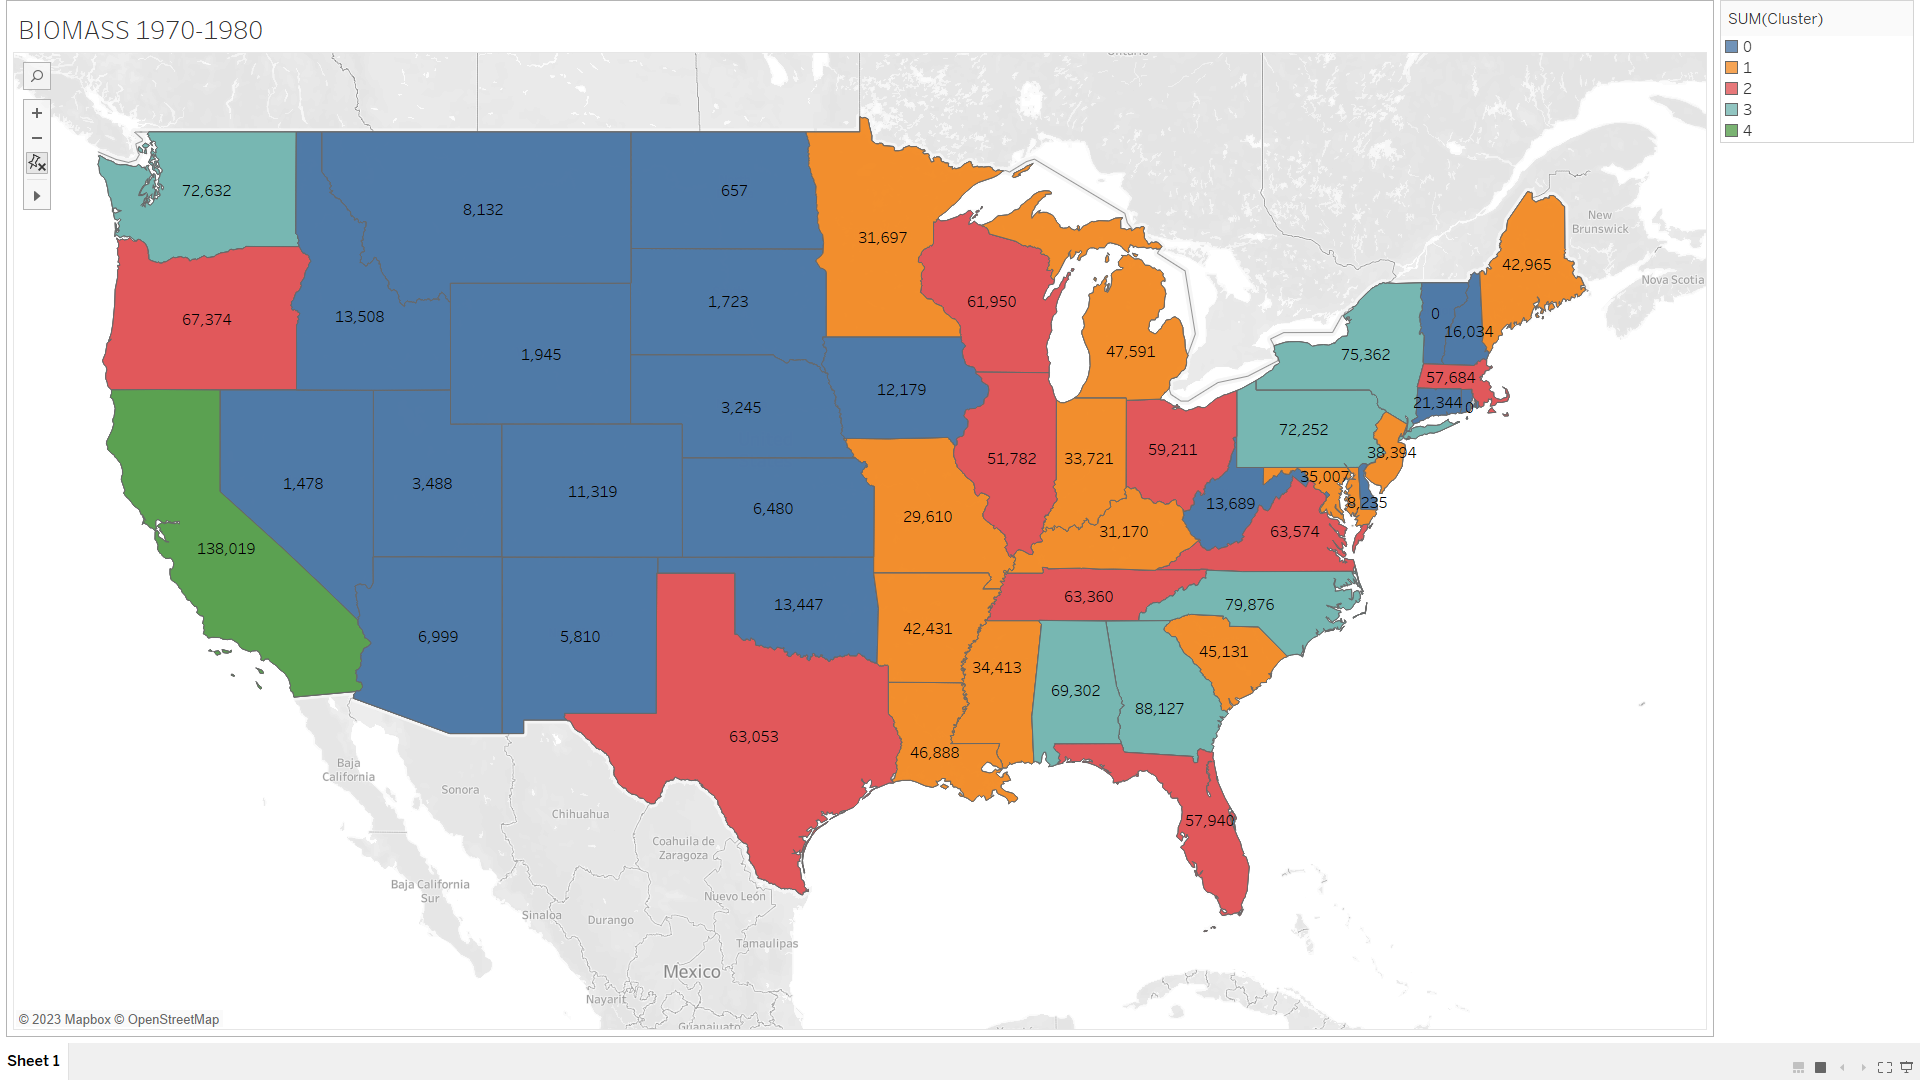

### Average for 1980 to 1990 and dividing it into 5 clusters

In [26]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1980 to 1990 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  # Sort states within the cluster
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Biomass_1980-1990.csv', index=True)


All the states from 1980 to 1990 after clustering:

States in Cluster 0:
State: DE - Value: 2459.0
State: DC - Value: 2653.9
State: WY - Value: 3351.6
State: NV - Value: 3671.2
State: ND - Value: 3890.0
State: SD - Value: 4035.2
State: AK - Value: 4279.5
State: RI - Value: 4960.6
State: UT - Value: 5323.1
State: NM - Value: 7697.1
State: NE - Value: 8274.4
State: VT - Value: 13023.8
State: WV - Value: 13842.4
State: MT - Value: 14788.1
State: CO - Value: 15345.8
State: KS - Value: 15368.6
State: OK - Value: 16492.0
State: HI - Value: 17423.2
State: ID - Value: 19285.9
State: AZ - Value: 20673.5
Cluster 0 Range: 2459.00 - 20673.50

States in Cluster 1:
State: NH - Value: 23876.6
State: MO - Value: 26750.0
State: MD - Value: 34173.6
State: KY - Value: 34180.4
State: CT - Value: 34682.9
State: NJ - Value: 46748.1
Cluster 1 Range: 23876.60 - 46748.10

States in Cluster 2:
State: MN - Value: 52914.7
State: MS - Value: 53542.6
State: SC - Value: 59539.5
State: MA - Value: 62977.5
State: IN -

### Plot all the cluters into map using Tablaue

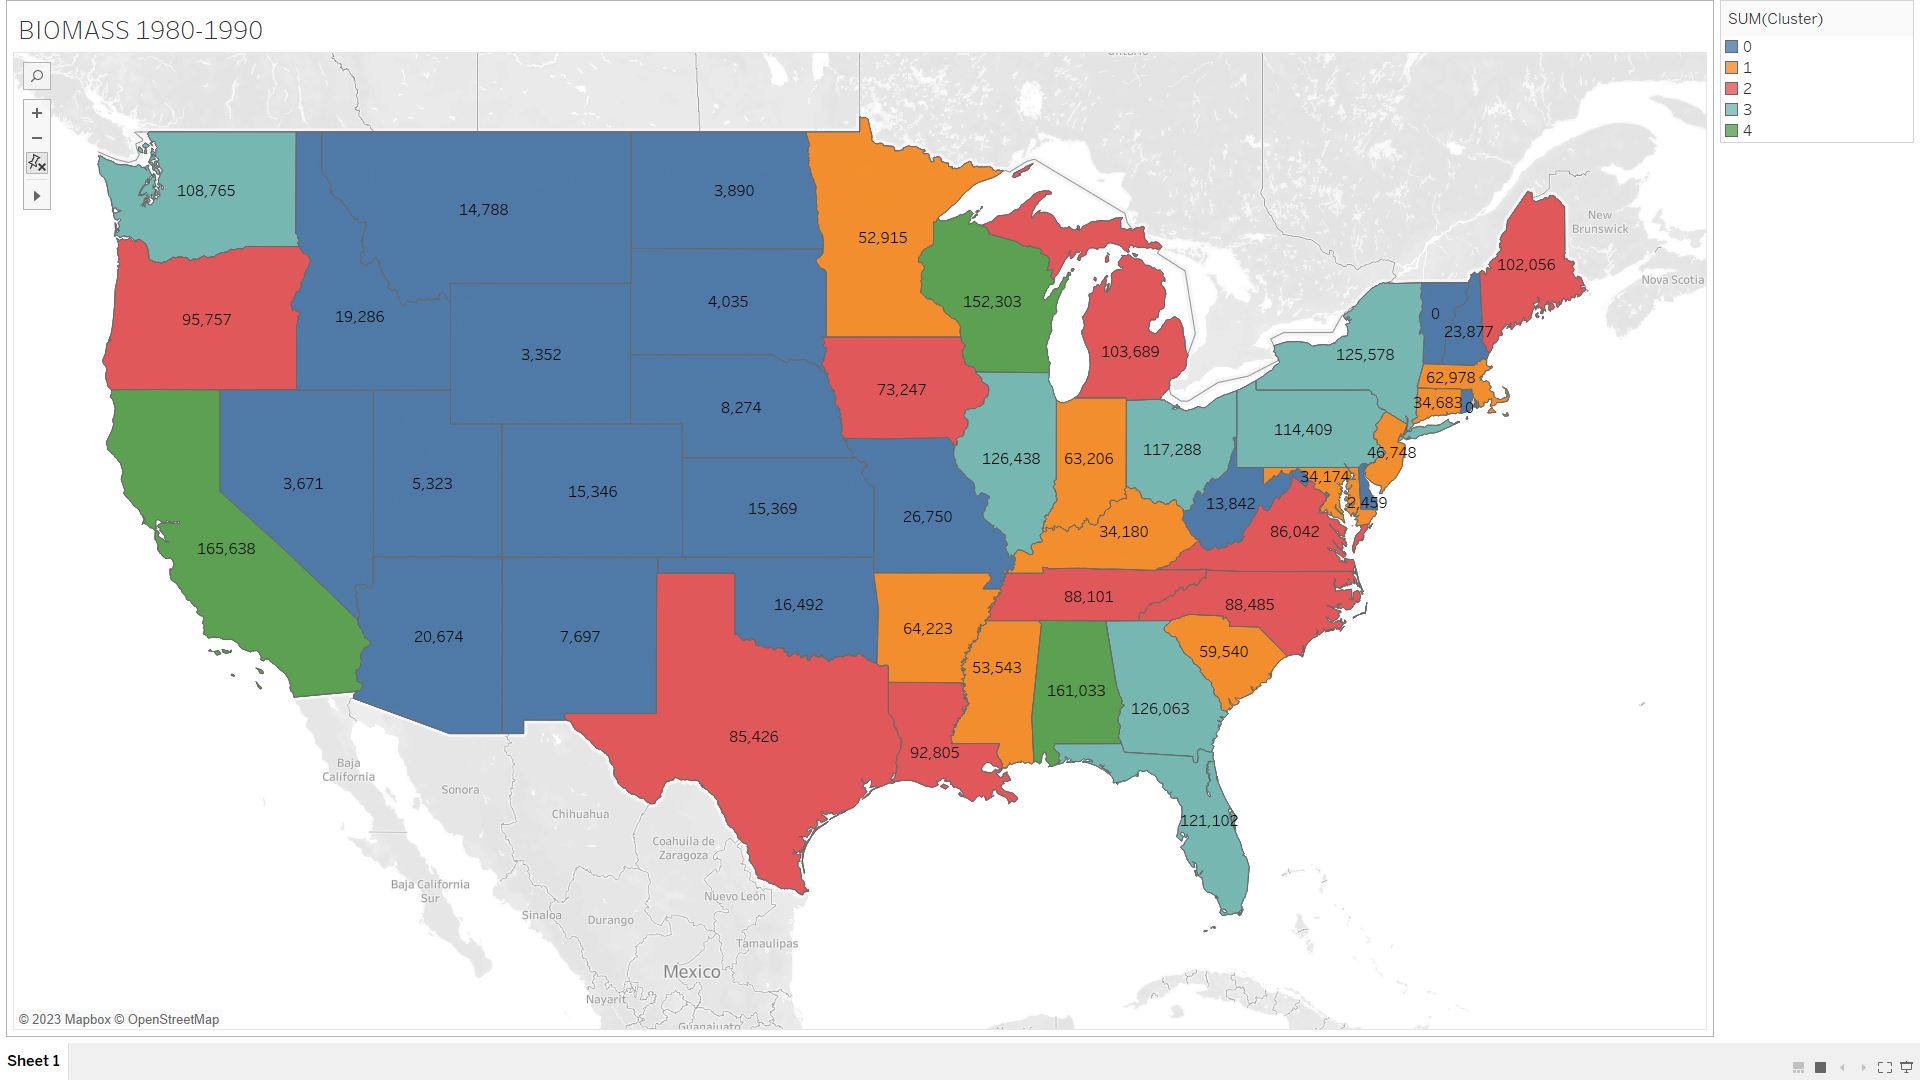

### Average for 1990 to 2000 and dividing it into 5 clusters

In [31]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1990 to 2000 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000')  
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Biomass_1990-2000.csv', index=True)


All the states from 1990 to 2000 after clustering:

States in Cluster 0:
State: DC - Value: 1552.8
State: WY - Value: 1835.5
State: DE - Value: 2098.9
State: ND - Value: 3825.7
State: SD - Value: 4340.5
State: UT - Value: 4440.7
State: NV - Value: 4522.7
State: RI - Value: 4648.6
State: WV - Value: 6150.5
State: NM - Value: 6162.8
State: AK - Value: 6192.6
State: VT - Value: 8176.8
State: KS - Value: 11707.6
State: MT - Value: 14139.6
State: AZ - Value: 14368.1
State: CO - Value: 14751.1
State: KY - Value: 15991.0
State: MO - Value: 17746.4
State: NE - Value: 18429.6
State: HI - Value: 20048.4
State: OK - Value: 23846.7
State: NH - Value: 25668.8
State: ID - Value: 26316.1
Cluster 0 Range: 1552.80 - 26316.10

States in Cluster 1:
State: MD - Value: 34045.2
State: NJ - Value: 39325.2
State: CT - Value: 40959.8
State: IN - Value: 46542.6
State: OR - Value: 48075.6
State: TN - Value: 57750.2
State: MA - Value: 59516.5
Cluster 1 Range: 34045.20 - 59516.50

States in Cluster 2:
State: IA - 

### Mapping using Tablaue

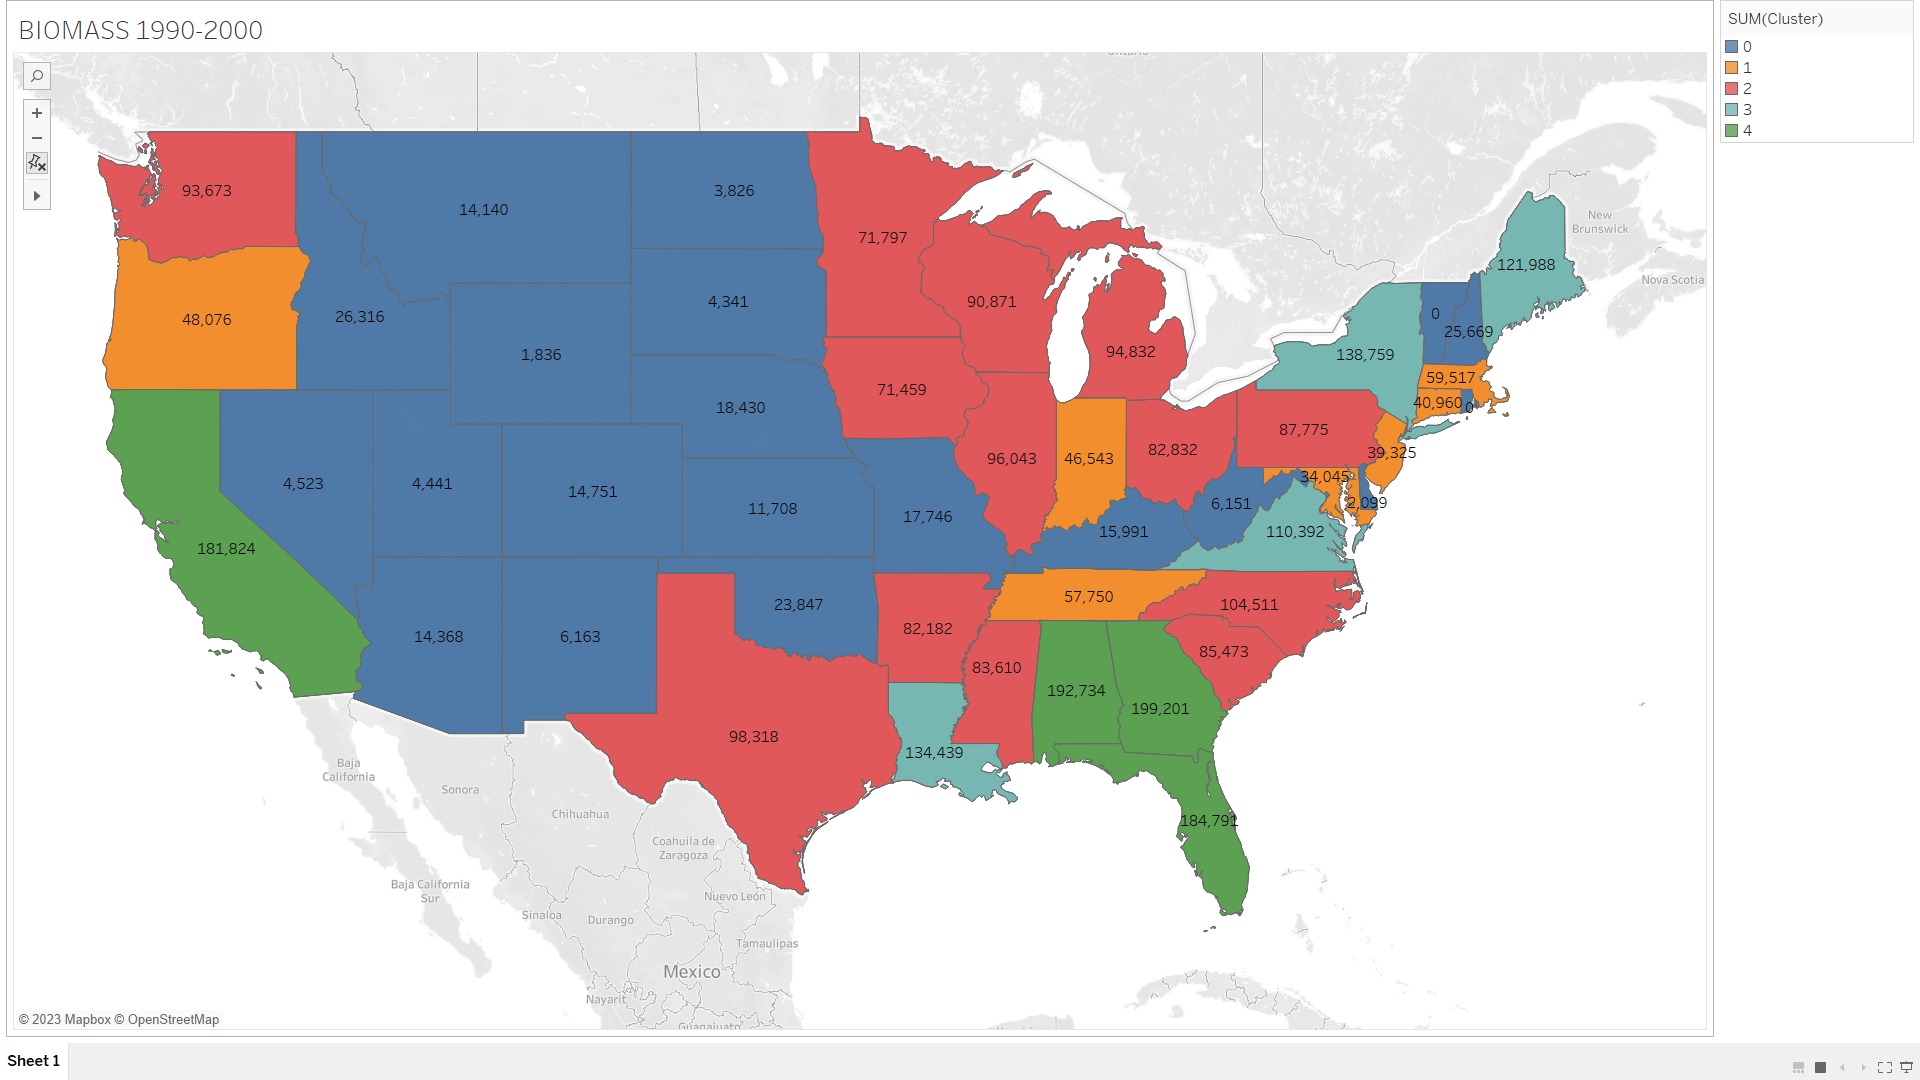

### Average for 2000 to 2010 and dividing it into 5 clusters

In [19]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 2000 to 2010 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Biomass_2000-2010.csv', index=True)


All the states from 2000 to 2010 after clustering:

States in Cluster 0:
State: DC - Value: 737.7
State: AK - Value: 2523.9
State: WY - Value: 2571.9
State: DE - Value: 3351.6
State: RI - Value: 4960.2
State: UT - Value: 5552.8
State: NV - Value: 7601.8
State: HI - Value: 9894.7
State: ND - Value: 10549.8
State: NM - Value: 10944.3
State: VT - Value: 13355.8
State: WV - Value: 13364.6
State: MT - Value: 15879.0
State: CO - Value: 18394.7
Cluster 0 Range: 737.70 - 18394.70

States in Cluster 1:
State: AZ - Value: 21547.5
State: KS - Value: 23612.9
State: NH - Value: 24241.4
State: OK - Value: 29306.4
State: ID - Value: 30497.8
State: CT - Value: 30570.2
State: SD - Value: 31901.9
State: MD - Value: 35361.3
State: KY - Value: 39040.3
State: NJ - Value: 40794.1
State: MO - Value: 44399.9
State: MA - Value: 45958.5
Cluster 1 Range: 21547.50 - 45958.50

States in Cluster 2:
State: OR - Value: 54014.0
State: NE - Value: 55489.0
State: MS - Value: 57998.4
State: IN - Value: 66149.4
State: OH 

### Mapping using Tablaue

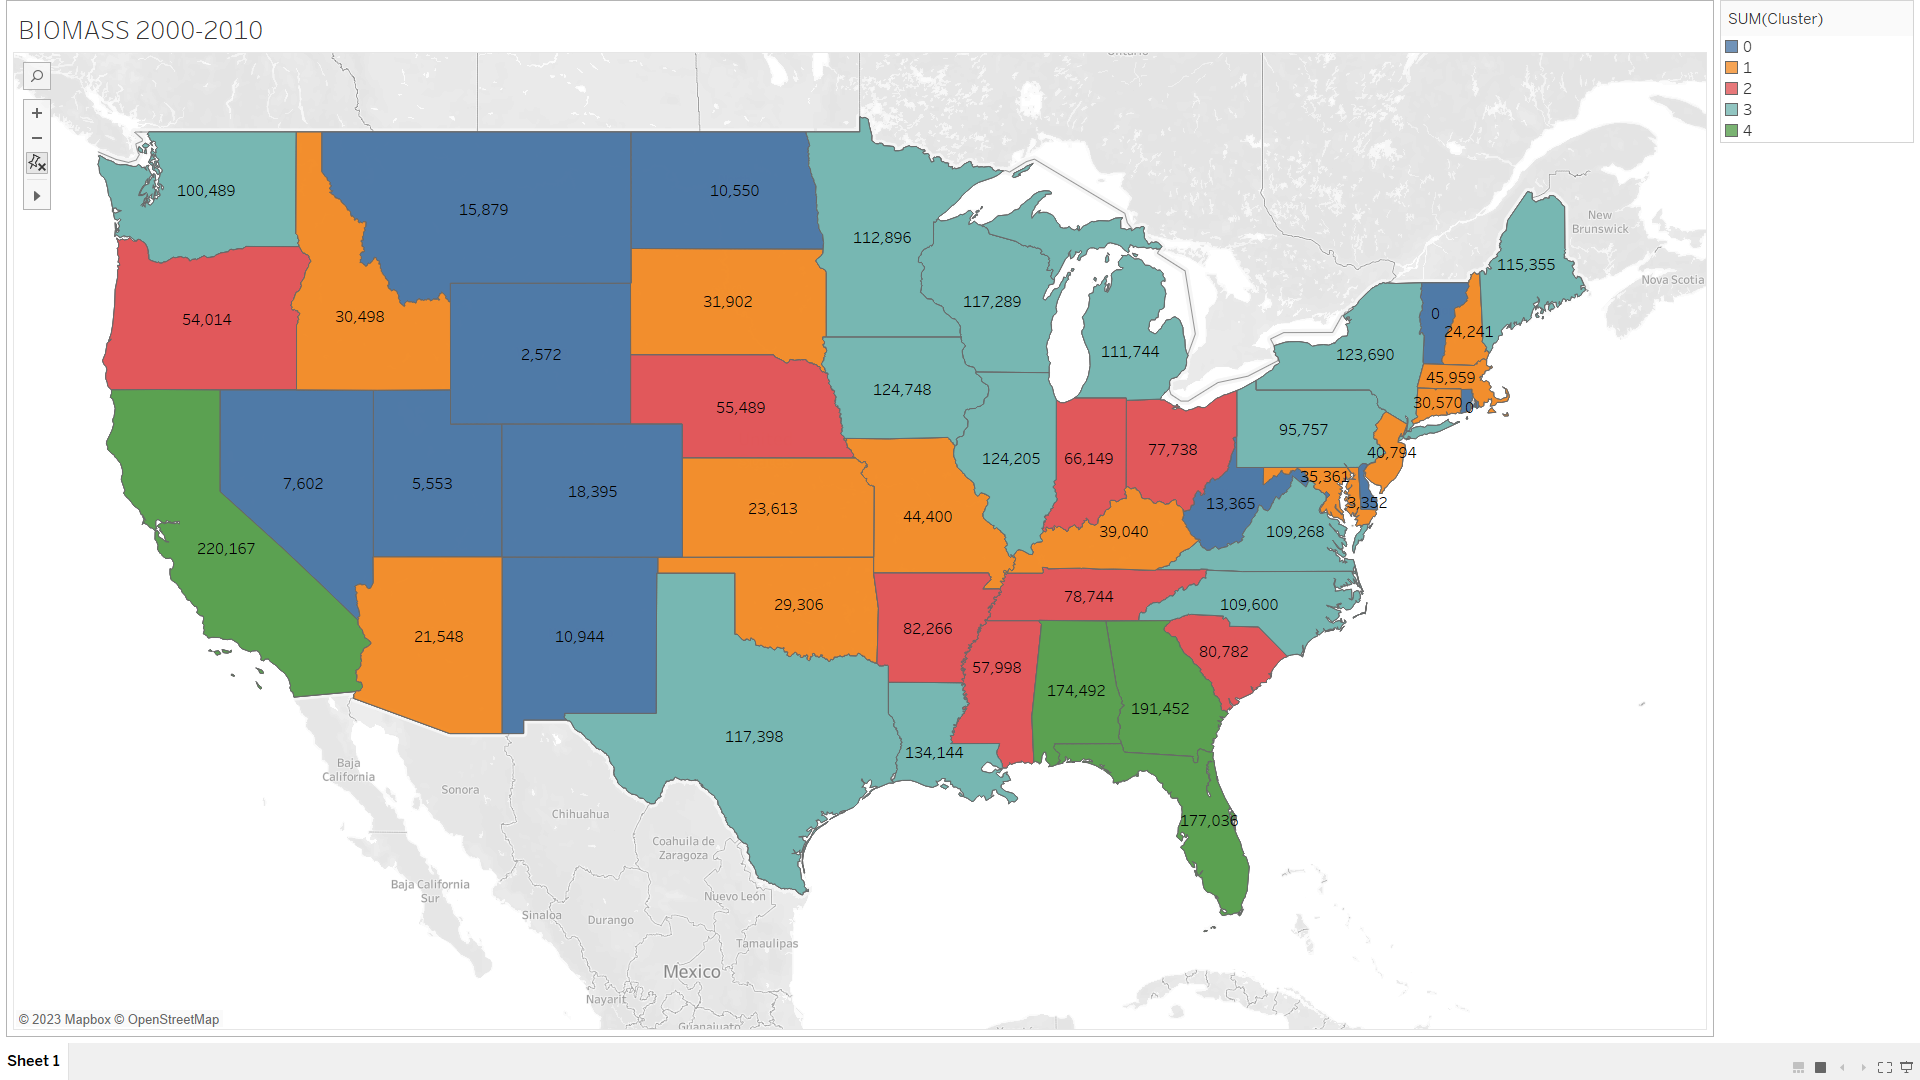

### Average for 2010 to 2020 and dividing it into 5 clusters

In [18]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 2010 to 2020 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Biomass_2010-2020.csv', index=True)


All the states from 2010 to 2020 after clustering:

States in Cluster 0:
State: DC - Value: 1486.2
State: DE - Value: 6185.1
State: AK - Value: 6485.0
State: WY - Value: 7047.9
State: RI - Value: 7123.7
State: HI - Value: 11008.9
State: NV - Value: 12780.6
State: UT - Value: 14033.0
State: MT - Value: 15908.2
State: NM - Value: 20859.8
State: VT - Value: 22899.0
State: WV - Value: 23170.7
State: ND - Value: 30739.6
State: AZ - Value: 34472.2
State: CT - Value: 37872.7
State: CO - Value: 40474.2
Cluster 0 Range: 1486.20 - 40474.20

States in Cluster 1:
State: ID - Value: 41895.0
State: NH - Value: 43031.9
State: KS - Value: 46071.9
State: MD - Value: 48170.4
State: OK - Value: 51010.9
State: KY - Value: 58422.9
State: NJ - Value: 59961.7
State: MA - Value: 61947.3
State: SD - Value: 67030.8
State: MO - Value: 71649.9
State: MS - Value: 73424.2
State: OR - Value: 88899.1
State: AR - Value: 96417.1
State: TN - Value: 101548.5
Cluster 1 Range: 41895.00 - 101548.50

States in Cluster 2:
Sta

### Mapping using Tablaue

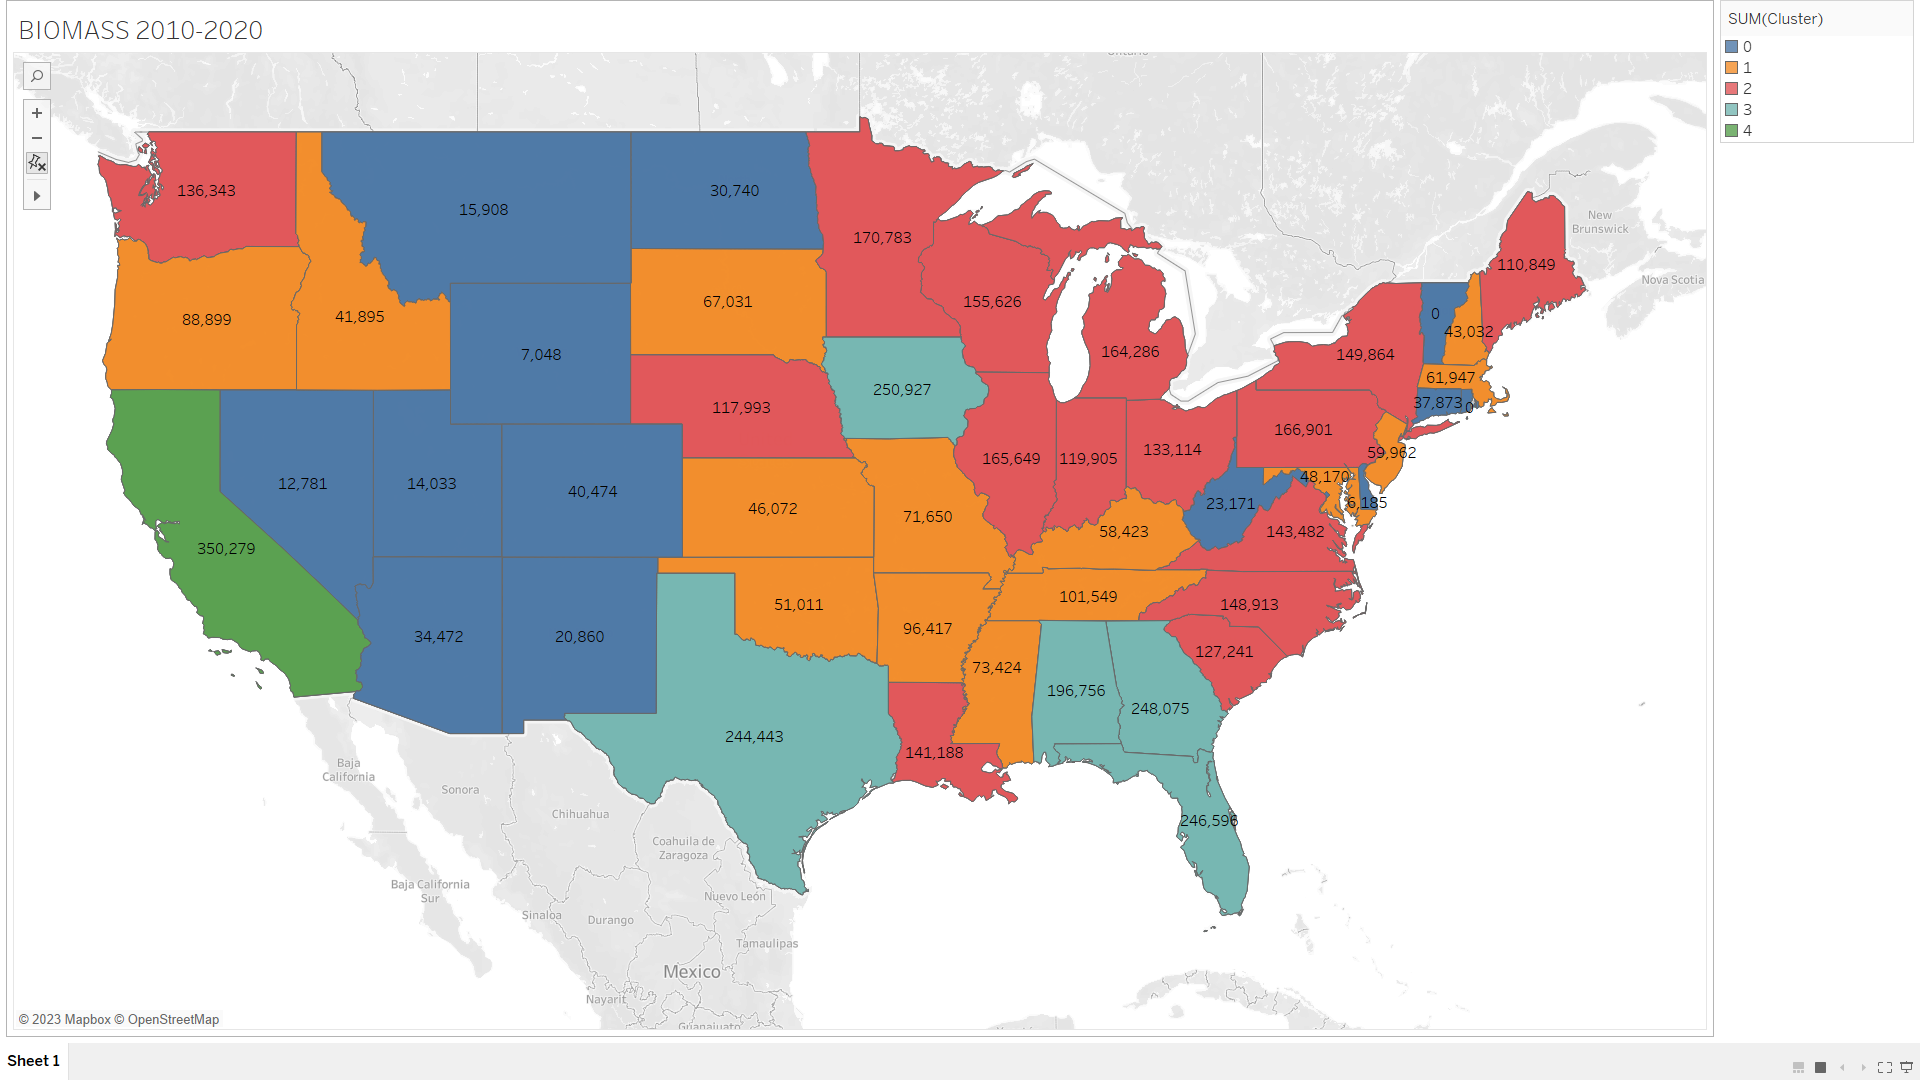

## Knowing the progess of the top 6 states.

### Progress of the states from 1960 to 1970

In [25]:
# Load the CSV file and read the file
file_path = 'Biomass_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

#  list of state abbreviations to retrieve information 
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)

Information for states in the 1960-1970 interval:
    1960-1970  Cluster State Full Name
IA    5948.64        0            Iowa
FL   39199.27        2         Florida
TX   43146.09        2           Texas
AL   48577.45        2         Alabama
GA   72287.27        3         Georgia
CA   98852.00        4      California


### Progress of the states from 1970 to 1980

In [26]:
# Load the CSV file and read the file
file_path = 'Biomass_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

#  list of state abbreviations to retrieve information 
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)

Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
IA    12179.3        0            Iowa
FL    57940.2        2         Florida
TX    63053.4        2           Texas
AL    69302.0        3         Alabama
GA    88126.7        3         Georgia
CA   138018.9        4      California


### Progress of the states from 1980 to 1990

In [27]:
# Load the CSV file and read the file
file_path = 'Biomass_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

#  list of state abbreviations to retrieve information 
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)

Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
IA    73247.3        2            Iowa
TX    85425.6        2           Texas
FL   121101.7        3         Florida
GA   126063.4        3         Georgia
AL   161033.2        4         Alabama
CA   165638.3        4      California


### Progress of the states from 1990 to 2000

In [28]:
# Load the CSV file and read the file
file_path = 'Biomass_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

#  list of state abbreviations to retrieve information 
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1990-2000 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)

Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
IA    71459.0        2            Iowa
TX    98317.7        2           Texas
CA   181823.9        4      California
FL   184791.4        4         Florida
AL   192733.8        4         Alabama
GA   199200.8        4         Georgia


### Progress of the states from 2000 to 2010

In [29]:
# Load the CSV file and read the file
file_path = 'Biomass_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)

Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
TX   117398.3        3           Texas
IA   124747.6        3            Iowa
AL   174491.9        4         Alabama
FL   177035.9        4         Florida
GA   191452.0        4         Georgia
CA   220166.9        4      California


### Progress of the states from 2010 to 2020

In [30]:
# Load the CSV file and read the file
file_path = 'Biomass_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

#  list of state abbreviations to retrieve information 
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)

Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
AL   196756.2        3         Alabama
TX   244443.2        3           Texas
FL   246596.0        3         Florida
GA   248074.7        3         Georgia
IA   250927.4        3            Iowa
CA   350279.2        4      California


### Plot the selected states

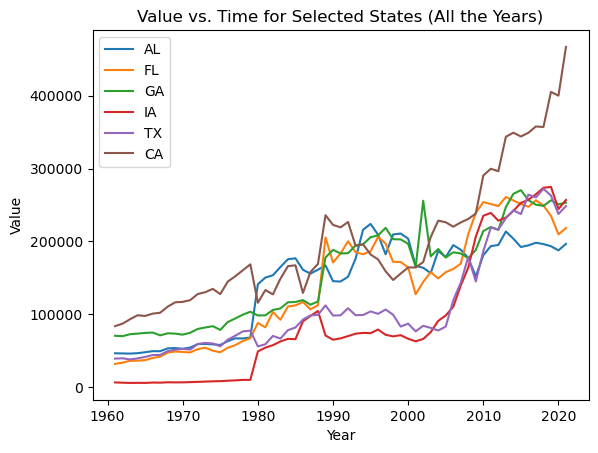

In [10]:
# Select only the 60 columns
Biomass_60 = Biomass.iloc[:, 1:62]

# Transpose the data to have years as rows and states as columns
Biomass_60_T = Biomass_60.transpose()

#  list of state abbreviations to plot
state_abbreviations =  ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Biomass_60_T.index, Biomass_60_T[state], label=state)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

### BAR GRAPH

In [ ]:
# Transpose the data to have years as rows and states as columns
Biomass_T = Biomass.transpose()

# Use iloc to get the required years (2019 to 2021)
selected_years = Biomass_T.loc['2019':'2021']

#  list of state abbreviations to plot
state_abbreviations = ['AL', 'FL', 'GA', 'IA', 'TX','CA']

# Set the width of the bars
bar_width = 0. 1

# Plot data for the selected states with the correct legend label
for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions = np.arange(len(selected_years.index)) + i * bar_width
    
    plt.bar(x_positions, selected_years[state], label=state, width=bar_width)

# X-labels
plt.xlabel('Year')
# Y-labels
plt.ylabel('Value')
# Title
plt.title('Value vs. Time for Selected States (2019-2021)')
plt.xticks(np.arange(len(selected_years.index)) + (len(state_abbreviations) - 1) * bar_width / 2, selected_years.index)
# add legend
plt.legend()

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM

In [8]:
# sequence length and other parameters
sequence_length_lstm = 45
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['AL', 'FL', 'GA', 'IA', 'TX','CA']:
    # Extract the data for the selected state
    data = Biomass.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    custom_optimizer = Adam(learning_rate=0.001)
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, input_shape=(sequence_length_lstm, 1), activation='relu'))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Biomass.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 374ms/step
Epoch 1/20
18/18 [==============================] - 4s 13ms/step - loss: 0.6244
Epoch 2/20
18/18 [==============================] - 0s 19ms/step - loss: 0.2972
Epoch 3/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0962
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0613
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0350
Epoch 6/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0382
Epoch 7/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0356
Epoch 8/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0443
Epoch 9/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0375
Epoch 10/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0365
Epoch 11/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0388
Epoch 12/20
18/18 [==============================] - 0s 11ms/step

27/27 [==============================] - 0s 12ms/step - loss: 0.0230
Epoch 18/20
27/27 [==============================] - 0s 13ms/step - loss: 0.0253
Epoch 19/20
27/27 [==============================] - 0s 13ms/step - loss: 0.0220
Epoch 20/20
1/1 [==============================] - 0s 72ms/step
Epoch 1/20
28/28 [==============================] - 0s 12ms/step - loss: 0.0212
Epoch 2/20
28/28 [==============================] - 0s 14ms/step - loss: 0.0217
Epoch 3/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0215
Epoch 4/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0214
Epoch 5/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0231
Epoch 6/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0217
Epoch 7/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0242
Epoch 8/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0219
Epoch 9/20
28/28 [==============================] - 0s 14ms/step 

37/37 [==============================] - 0s 11ms/step - loss: 0.0258
Epoch 14/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0253
Epoch 15/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 16/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0252
Epoch 17/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 18/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0249
Epoch 19/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0236
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 5/20
38/38 [==============================] - 0s 9ms/ste

47/47 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 10/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0138
Epoch 11/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 12/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0138
Epoch 13/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0135
Epoch 14/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 15/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 16/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0133
Epoch 17/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 18/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0138
Epoch 19/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
48/48 [==============================] - 0s 10

57/57 [==============================] - 1s 13ms/step - loss: 0.0086
Epoch 6/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0087
Epoch 7/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0080
Epoch 8/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0077
Epoch 9/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0081
Epoch 10/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0087
Epoch 11/20
57/57 [==============================] - 1s 14ms/step - loss: 0.0090
Epoch 12/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0082
Epoch 13/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0073
Epoch 14/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0080
Epoch 15/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0085
Epoch 16/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 17/20
57/57 [=========================

21/21 [==============================] - 0s 12ms/step - loss: 0.0195
Epoch 20/20
1/1 [==============================] - 0s 97ms/step
Epoch 1/20
22/22 [==============================] - 0s 17ms/step - loss: 0.0176
Epoch 2/20
22/22 [==============================] - 0s 17ms/step - loss: 0.0193
Epoch 3/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0203
Epoch 4/20
22/22 [==============================] - 0s 14ms/step - loss: 0.0188
Epoch 5/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0182
Epoch 6/20
22/22 [==============================] - 0s 14ms/step - loss: 0.0205
Epoch 7/20
22/22 [==============================] - 0s 13ms/step - loss: 0.0222
Epoch 8/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0245
Epoch 9/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 10/20
22/22 [==============================] - 0s 15ms/step - loss: 0.0216
Epoch 11/20
22/22 [==============================] - 0s 12ms/step 

31/31 [==============================] - 0s 13ms/step - loss: 0.0175
Epoch 16/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 17/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 18/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0155
Epoch 19/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0150
Epoch 20/20
1/1 [==============================] - 0s 95ms/step
Epoch 1/20
32/32 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 2/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0150
Epoch 3/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 4/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 5/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 6/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 7/20
32/32 [==============================] - 0s 10ms/ste

41/41 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 12/20
41/41 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 13/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 14/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 15/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 16/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 17/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0099
Epoch 18/20
41/41 [==============================] - 0s 11ms/step - loss: 0.0089
Epoch 19/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 20/20
1/1 [==============================] - 0s 47ms/step
Epoch 1/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 2/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 3/20
42/42 [==============================] - 0s 10ms

51/51 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 8/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 9/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 10/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 11/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 12/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 13/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 14/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0080
Epoch 15/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0076
Epoch 16/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0088
Epoch 17/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0070
Epoch 18/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 19/20
51/51 [==============================

61/61 [==============================] - 1s 10ms/step - loss: 0.0071
Epoch 4/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0058
Epoch 5/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0059
Epoch 6/20
61/61 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 7/20
61/61 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 8/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0062
Epoch 9/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0066
Epoch 10/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0063
Epoch 11/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0063
Epoch 12/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 13/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0059
Epoch 14/20
61/61 [==============================] - 1s 13ms/step - loss: 0.0068
Epoch 15/20
61/61 [=============================

25/25 [==============================] - 0s 11ms/step - loss: 0.0201
Epoch 18/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0193
Epoch 19/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0191
Epoch 20/20
1/1 [==============================] - 0s 91ms/step
Epoch 1/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 2/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 3/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0199
Epoch 4/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0182
Epoch 5/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0212
Epoch 6/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0198
Epoch 7/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0198
Epoch 8/20
26/26 [==============================] - 0s 15ms/step - loss: 0.0195
Epoch 9/20
26/26 [==============================] - 0s 15ms/step 

35/35 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 14/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 15/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 16/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 17/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 18/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 19/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 2/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 3/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 4/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 5/20
36/36 [==============================] - 0s 9ms/step 

45/45 [==============================] - 0s 11ms/step - loss: 0.0140
Epoch 10/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 11/20
45/45 [==============================] - 1s 11ms/step - loss: 0.0146
Epoch 12/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 13/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 14/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 15/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0140
Epoch 16/20
45/45 [==============================] - 1s 12ms/step - loss: 0.0142
Epoch 17/20
45/45 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 18/20
45/45 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 19/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
46/46 [==============================] - 0s 10m

55/55 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 6/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 7/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 8/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0130
Epoch 9/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0111
Epoch 10/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 11/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0120
Epoch 12/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0125
Epoch 13/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0132
Epoch 14/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0113
Epoch 15/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 16/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0131
Epoch 17/20
55/55 [=========================

60/60 [==============================] - 1s 14ms/step - loss: 0.0099
Epoch 5/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0101
Epoch 6/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0100
Epoch 7/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0102
Epoch 8/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0100
Epoch 9/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 10/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0117
Epoch 11/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0116
Epoch 12/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0107
Epoch 13/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0104
Epoch 14/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0108
Epoch 15/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0101
Epoch 16/20
60/60 [==========================

1/1 [==============================] - 0s 66ms/step
Epoch 1/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0782
Epoch 2/20
20/20 [==============================] - 0s 14ms/step - loss: 0.1057
Epoch 3/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0721
Epoch 4/20
20/20 [==============================] - 0s 13ms/step - loss: 0.0716
Epoch 5/20
20/20 [==============================] - 0s 13ms/step - loss: 0.0736
Epoch 6/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0590
Epoch 7/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0483
Epoch 8/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0610
Epoch 9/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0394
Epoch 10/20
20/20 [==============================] - 0s 13ms/step - loss: 0.0397
Epoch 11/20
20/20 [==============================] - 0s 13ms/step - loss: 0.0407
Epoch 12/20
20/20 [==============================] - 0s 12ms/step 

29/29 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 17/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 18/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 19/20
29/29 [==============================] - 0s 14ms/step - loss: 0.0263
Epoch 20/20
1/1 [==============================] - 0s 135ms/step
Epoch 1/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0235
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0268
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0231
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0254
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0201
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0196
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0223
Epoch 8/20
30/30 [==============================] - 0s 15ms/ste

39/39 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 13/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 14/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 15/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 16/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 17/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0164
Epoch 18/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0151
Epoch 19/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 20/20
1/1 [==============================] - 0s 72ms/step
Epoch 1/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 2/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0178
Epoch 3/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 4/20
40/40 [==============================] - 0s 10ms/

49/49 [==============================] - 1s 11ms/step - loss: 0.0110
Epoch 9/20
49/49 [==============================] - 1s 12ms/step - loss: 0.0111
Epoch 10/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0115
Epoch 11/20
49/49 [==============================] - 1s 10ms/step - loss: 0.0118
Epoch 12/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0112
Epoch 13/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 14/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0114
Epoch 15/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 16/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 17/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 18/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 19/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 20/20
1/1 [==========================

59/59 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 5/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0133
Epoch 6/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0105
Epoch 7/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 8/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0109
Epoch 9/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 10/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0091
Epoch 11/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0100
Epoch 12/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 13/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0091
Epoch 14/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0090
Epoch 15/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0092
Epoch 16/20
59/59 [==========================

1/1 [==============================] - 0s 44ms/step
Epoch 1/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0700
Epoch 2/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0678
Epoch 3/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0749
Epoch 4/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0621
Epoch 5/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0645
Epoch 6/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0596
Epoch 7/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0596
Epoch 8/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0550
Epoch 9/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0593
Epoch 10/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0703
Epoch 11/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0605
Epoch 12/20
19/19 [==============================] - 0s 11ms/step 

28/28 [==============================] - 0s 10ms/step - loss: 0.0202
Epoch 17/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 18/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 19/20
28/28 [==============================] - 0s 12ms/step - loss: 0.0179
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0172
Epoch 2/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0160
Epoch 3/20
29/29 [==============================] - 0s 13ms/step - loss: 0.0172
Epoch 4/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 5/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 6/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 7/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 8/20
29/29 [==============================] - 0s 12ms/step

38/38 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 13/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 14/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 15/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0102
Epoch 16/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0115
Epoch 17/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0112
Epoch 18/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0122
Epoch 19/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0142
Epoch 20/20
1/1 [==============================] - 0s 42ms/step
Epoch 1/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0119
Epoch 2/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 3/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 4/20
39/39 [==============================] - 0s 11ms/

48/48 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 9/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0097
Epoch 10/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 11/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 12/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 13/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 14/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0114
Epoch 15/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0112
Epoch 16/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 17/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 18/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 19/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 20/20
1/1 [=========================

58/58 [==============================] - 1s 11ms/step - loss: 0.0092
Epoch 5/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0085
Epoch 6/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0079
Epoch 7/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0091
Epoch 8/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0078
Epoch 9/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0077
Epoch 10/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 11/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0084
Epoch 12/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0092
Epoch 13/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0078
Epoch 14/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0075
Epoch 15/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0083
Epoch 16/20
58/58 [==========================

22/22 [==============================] - 0s 12ms/step - loss: 0.0224
Epoch 19/20
22/22 [==============================] - 0s 13ms/step - loss: 0.0217
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0285
Epoch 2/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0277
Epoch 3/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0273
Epoch 4/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 6/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0243
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 8/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 10/20
23/23 [==============================] - 0s 12ms/step -

32/32 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 15/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0152
Epoch 16/20
32/32 [==============================] - 0s 13ms/step - loss: 0.0148
Epoch 17/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 18/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 19/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0144
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 2/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 3/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 4/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 5/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 6/20
33/33 [==============================] - 0s 13ms/step 

Epoch 13/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 14/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 15/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 16/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 17/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0122
Epoch 18/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 19/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 3/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 5/20
38/38 [==============================] - 0

47/47 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 10/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 11/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 12/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 13/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 14/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0098
Epoch 15/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0092
Epoch 16/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0105
Epoch 17/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0102
Epoch 18/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0145
Epoch 19/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
48/48 [==============================] - 1s 14m

57/57 [==============================] - 1s 10ms/step - loss: 0.0083
Epoch 6/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 7/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0079
Epoch 8/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0087
Epoch 9/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0079
Epoch 10/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0087
Epoch 11/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0088
Epoch 12/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0087
Epoch 13/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0087
Epoch 14/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0086
Epoch 15/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0090
Epoch 16/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0089
Epoch 17/20
57/57 [=============================

In [6]:
# sequence length and other parameters
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['AL']:
    # Extract the data for the selected state
    data = Biomass.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    custom_optimizer = Adam(learning_rate=0.001) 
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=150, input_shape=(sequence_length_lstm, 1), activation='relu', return_sequences=True))
    model_lstm.add(Dropout(0.5))  
    model_lstm.add(LSTM(units=100, activation='relu', return_sequences=True))
    model_lstm.add(Dropout(0.4))  
    model_lstm.add(LSTM(units=50, activation='relu'))
    model_lstm.add(Dropout(0.2))  
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Biomass.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 4s 4s/step
Epoch 1/20
23/23 [==============================] - 28s 121ms/step - loss: 0.3315
Epoch 2/20
23/23 [==============================] - 3s 124ms/step - loss: 0.2628
Epoch 3/20
23/23 [==============================] - 3s 131ms/step - loss: 0.0963
Epoch 4/20
23/23 [==============================] - 3s 119ms/step - loss: 0.0503
Epoch 5/20
23/23 [==============================] - 3s 132ms/step - loss: 0.0306
Epoch 6/20
23/23 [==============================] - 3s 125ms/step - loss: 0.0232
Epoch 7/20
23/23 [==============================] - 3s 133ms/step - loss: 0.0271
Epoch 8/20
23/23 [==============================] - 3s 120ms/step - loss: 0.0309
Epoch 9/20
23/23 [==============================] - 3s 129ms/step - loss: 0.0243
Epoch 10/20
23/23 [==============================] - 3s 126ms/step - loss: 0.0291
Epoch 11/20
23/23 [==============================] - 3s 118ms/step - loss: 0.0255
Epoch 12/20
23/23 [==============================] - 3s 

32/32 [==============================] - 2s 49ms/step - loss: 0.0078
Epoch 17/20
32/32 [==============================] - 1s 46ms/step - loss: 0.0092
Epoch 18/20
32/32 [==============================] - 2s 51ms/step - loss: 0.0094
Epoch 19/20
32/32 [==============================] - 1s 46ms/step - loss: 0.0090
Epoch 20/20
1/1 [==============================] - 0s 62ms/step
Epoch 1/20
33/33 [==============================] - 2s 47ms/step - loss: 0.0086
Epoch 2/20
33/33 [==============================] - 2s 48ms/step - loss: 0.0092
Epoch 3/20
33/33 [==============================] - 2s 47ms/step - loss: 0.0094
Epoch 4/20
33/33 [==============================] - 2s 48ms/step - loss: 0.0098
Epoch 5/20
33/33 [==============================] - 2s 47ms/step - loss: 0.0077
Epoch 6/20
33/33 [==============================] - 2s 48ms/step - loss: 0.0082
Epoch 7/20
33/33 [==============================] - 2s 49ms/step - loss: 0.0088
Epoch 8/20
33/33 [==============================] - 2s 51ms/step

42/42 [==============================] - 2s 42ms/step - loss: 0.0064
Epoch 13/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0061
Epoch 14/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0065
Epoch 15/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0075
Epoch 16/20
42/42 [==============================] - 2s 42ms/step - loss: 0.0052
Epoch 17/20
42/42 [==============================] - 2s 40ms/step - loss: 0.0071
Epoch 18/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0061
Epoch 19/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0064
Epoch 20/20
1/1 [==============================] - 0s 60ms/step
Epoch 1/20
43/43 [==============================] - 2s 42ms/step - loss: 0.0045
Epoch 2/20
43/43 [==============================] - 2s 42ms/step - loss: 0.0065
Epoch 3/20
43/43 [==============================] - 2s 43ms/step - loss: 0.0063
Epoch 4/20
43/43 [==============================] - 2s 42ms/

52/52 [==============================] - 2s 44ms/step - loss: 0.0057
Epoch 9/20
52/52 [==============================] - 2s 43ms/step - loss: 0.0048
Epoch 10/20
52/52 [==============================] - 2s 44ms/step - loss: 0.0061
Epoch 11/20
52/52 [==============================] - 2s 45ms/step - loss: 0.0054
Epoch 12/20
52/52 [==============================] - 2s 43ms/step - loss: 0.0053
Epoch 13/20
52/52 [==============================] - 2s 44ms/step - loss: 0.0049
Epoch 14/20
52/52 [==============================] - 2s 46ms/step - loss: 0.0064
Epoch 15/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0060
Epoch 16/20
52/52 [==============================] - 3s 48ms/step - loss: 0.0067
Epoch 17/20
52/52 [==============================] - 2s 44ms/step - loss: 0.0047
Epoch 18/20
52/52 [==============================] - 2s 43ms/step - loss: 0.0056
Epoch 19/20
52/52 [==============================] - 2s 45ms/step - loss: 0.0056
Epoch 20/20
1/1 [========================

62/62 [==============================] - 3s 49ms/step - loss: 0.0083
Epoch 5/20
62/62 [==============================] - 3s 52ms/step - loss: 0.0073
Epoch 6/20
62/62 [==============================] - 3s 48ms/step - loss: 0.0088
Epoch 7/20
62/62 [==============================] - 3s 48ms/step - loss: 0.0067
Epoch 8/20
62/62 [==============================] - 3s 50ms/step - loss: 0.0086
Epoch 9/20
62/62 [==============================] - 3s 53ms/step - loss: 0.0097
Epoch 10/20
62/62 [==============================] - 3s 50ms/step - loss: 0.0074
Epoch 11/20
62/62 [==============================] - 3s 47ms/step - loss: 0.0078
Epoch 12/20
62/62 [==============================] - 3s 44ms/step - loss: 0.0071
Epoch 13/20
62/62 [==============================] - 3s 45ms/step - loss: 0.0081
Epoch 14/20
62/62 [==============================] - 3s 47ms/step - loss: 0.0056
Epoch 15/20
62/62 [==============================] - 3s 46ms/step - loss: 0.0078
Epoch 16/20
62/62 [==========================

In [7]:
# Display the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 40, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           100400    
                                                                 
 dropout_1 (Dropout)         (None, 40, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

### BAR GRAPH

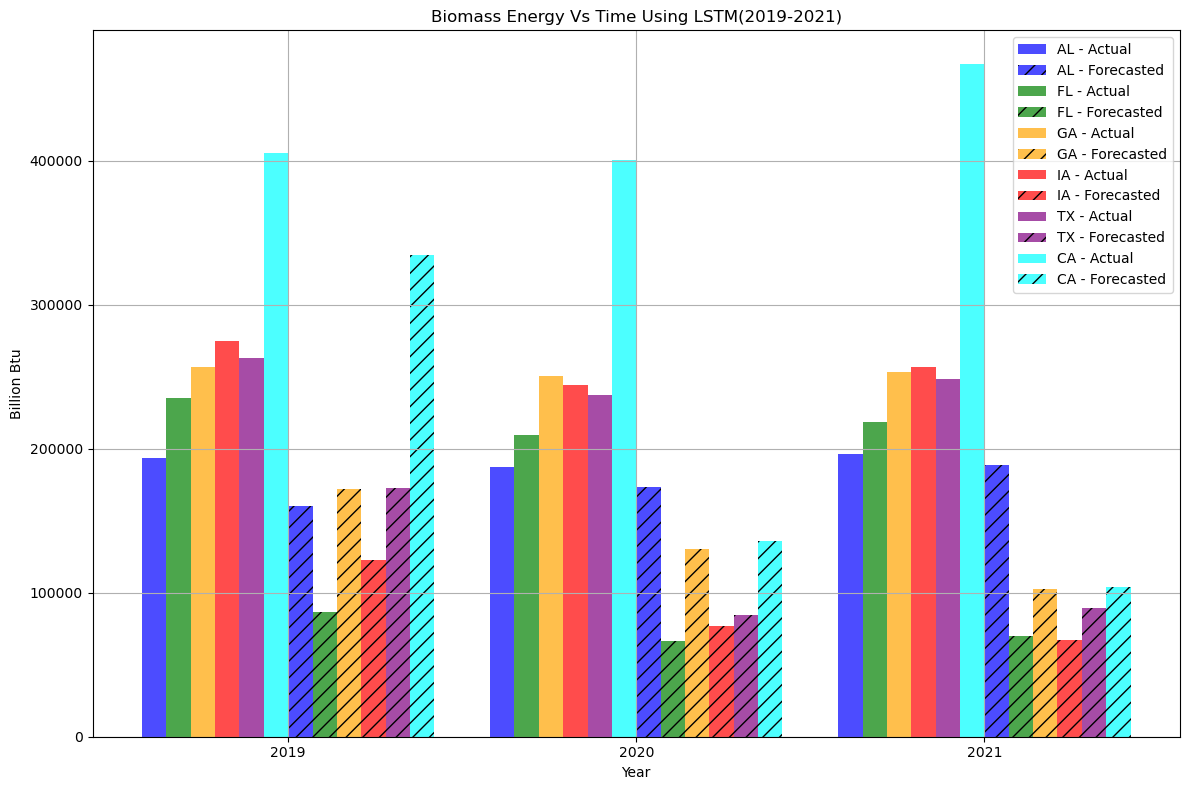

In [17]:
# list of state abbreviations 
state_abbreviations =  ['AL', 'FL', 'GA', 'IA', 'TX', 'CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Biomass_60_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.07

# colors for each state
state_colors = {'AL': 'blue', 'FL': 'green', 'GA': 'orange', 'IA': 'red', 'TX': 'purple', 'CA': 'cyan'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Biomass Energy Vs Time Using LSTM(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


### GRU

In [19]:
# sequence length and other parameters
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['AL', 'FL', 'GA', 'IA', 'TX', 'CA']:
    # Extract the data for the selected state
    data = Biomass.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Biomass.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")


1/1 [==============================] - 0s 236ms/step
Epoch 1/20
23/23 [==============================] - 2s 8ms/step - loss: 0.4939
Epoch 2/20
23/23 [==============================] - 0s 13ms/step - loss: 0.1230
Epoch 3/20
23/23 [==============================] - 0s 13ms/step - loss: 0.0098
Epoch 4/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0100
Epoch 6/20
23/23 [==============================] - 0s 14ms/step - loss: 0.0095
Epoch 7/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0096
Epoch 8/20
23/23 [==============================] - 0s 14ms/step - loss: 0.0097
Epoch 9/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0096
Epoch 10/20
23/23 [==============================] - 0s 13ms/step - loss: 0.0092
Epoch 11/20
23/23 [==============================] - 0s 13ms/step - loss: 0.0103
Epoch 12/20
23/23 [==============================] - 0s 15ms/step 

1/1 [==============================] - 0s 31ms/step
Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 2/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 3/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 5/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 6/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 7/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 8/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 9/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 10/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 11/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 12/20
28/28 [==============================] - 0s 7ms/step - loss: 0.00

37/37 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 19/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0084
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 10/20
38/38 [==============================] - 0s 7ms/step - loss: 0.00

47/47 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 17/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 18/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 19/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 2/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 3/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 4/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 5/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 6/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 7/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 8/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0

57/57 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 15/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 16/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 17/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 18/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 19/20
57/57 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
58/58 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 2/20
58/58 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 3/20
58/58 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 4/20
58/58 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 5/20
58/58 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 6/20
58/58 [==============================] - 0s 7ms/step - loss: 0

27/27 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 10/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 11/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 12/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0136
Epoch 13/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 14/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 15/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 16/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 17/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0128
Epoch 18/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0136
Epoch 19/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0128
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
28/28 [==============================] - 0s 7ms/step - lo

37/37 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 8/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 9/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 10/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 11/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0067
Epoch 12/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 13/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 14/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 15/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 16/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 17/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 18/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 19/20
37/37 [==============================] - 0

47/47 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 5/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0042
Epoch 6/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 7/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 8/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 9/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 10/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0038
Epoch 11/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 12/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 13/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 14/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0040
Epoch 15/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 16/20
47/47 [==========================

57/57 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 2/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 3/20
57/57 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 4/20
57/57 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 6/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 7/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 8/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 9/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 10/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 11/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0035
Epoch 12/20
57/57 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 13/20
57/57 [==============================] - 0s 8

26/26 [==============================] - 0s 16ms/step - loss: 0.0296
Epoch 16/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0288
Epoch 17/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0305
Epoch 18/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0318
Epoch 19/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0286
Epoch 20/20
1/1 [==============================] - 0s 43ms/step
Epoch 1/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0308
Epoch 2/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0281
Epoch 3/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0312
Epoch 4/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0275
Epoch 5/20
27/27 [==============================] - 0s 14ms/step - loss: 0.0263
Epoch 6/20
27/27 [==============================] - 0s 14ms/step - loss: 0.0274
Epoch 7/20
27/27 [==============================] - 0s 16ms/step

Epoch 14/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0228
Epoch 15/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0211
Epoch 16/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0222
Epoch 17/20
31/31 [==============================] - 0s 15ms/step - loss: 0.0231
Epoch 18/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0222
Epoch 19/20
31/31 [==============================] - 0s 15ms/step - loss: 0.0216
Epoch 20/20
1/1 [==============================] - 0s 44ms/step
Epoch 1/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0221
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0206
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 6/20
32/32 [==============================] - 0s 

41/41 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 11/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 12/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0160
Epoch 13/20
41/41 [==============================] - 1s 12ms/step - loss: 0.0159
Epoch 14/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0153
Epoch 15/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0148
Epoch 16/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0156
Epoch 17/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 18/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 19/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 20/20
1/1 [==============================] - 0s 17ms/step
Epoch 1/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0175
Epoch 2/20
42/42 [==============================] - 0s 7ms/step

51/51 [==============================] - 0s 7ms/step - loss: 0.0139
Epoch 9/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0128
Epoch 10/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 11/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 12/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 13/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 14/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 15/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0144
Epoch 16/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 17/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0135
Epoch 18/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 19/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 20/20
1/1 [==============================] - 0s

61/61 [==============================] - 0s 7ms/step - loss: 0.0118
Epoch 7/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 8/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0155
Epoch 9/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 10/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0112
Epoch 11/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0107
Epoch 12/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 13/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0139
Epoch 14/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0117
Epoch 15/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0111
Epoch 16/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 17/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0117
Epoch 18/20
61/61 [==============================] 

31/31 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 2/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 3/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0199
Epoch 4/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0204
Epoch 5/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0201
Epoch 6/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0181
Epoch 7/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0183
Epoch 8/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 9/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 10/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0183
Epoch 11/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0196
Epoch 12/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 13/20
31/31 [==============================] - 0s 8ms/

40/40 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 2/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 3/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 4/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 5/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 6/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 7/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 8/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 9/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 10/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0089
Epoch 11/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0

50/50 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 18/20
50/50 [==============================] - 1s 15ms/step - loss: 0.0070
Epoch 19/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 2/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 3/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0071
Epoch 4/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 5/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 8/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 9/20
51/51 [==============================] - 0s 7ms/step - loss: 0.

60/60 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 16/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 17/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 18/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 19/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0129
Epoch 2/20
61/61 [==============================] - 1s 14ms/step - loss: 0.0145
Epoch 3/20
61/61 [==============================] - 1s 13ms/step - loss: 0.0100
Epoch 4/20
61/61 [==============================] - 1s 15ms/step - loss: 0.0103
Epoch 5/20
61/61 [==============================] - 1s 13ms/step - loss: 0.0099
Epoch 6/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0107
Epoch 7/20
61/61 [==============================] - 0s 7ms/step - los

25/25 [==============================] - 0s 15ms/step - loss: 0.0263
Epoch 12/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0262
Epoch 13/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0268
Epoch 14/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0269
Epoch 15/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0264
Epoch 16/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0273
Epoch 17/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0254
Epoch 18/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0258
Epoch 19/20
25/25 [==============================] - 0s 16ms/step - loss: 0.0262
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 2/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 3/20
26/26 [==============================] - 0s 7ms/st

35/35 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 10/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 11/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 12/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 13/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 14/20
35/35 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 15/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0184
Epoch 16/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0176
Epoch 17/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 18/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0178
Epoch 19/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0184
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
36/36 [==============================] - 0s 7ms/step -

45/45 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 8/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 9/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 10/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 11/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 12/20
45/45 [==============================] - 1s 14ms/step - loss: 0.0140
Epoch 13/20
45/45 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 14/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 15/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 16/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 17/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 18/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 19/20
45/45 [==============================] -

55/55 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 6/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 12/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 13/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 14/20
55/55 [==============================] - 1s 13ms/step - loss: 0.0083
Epoch 15/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0113
Epoch 16/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 17/20
55/55 [==============================] - 0s

1/1 [==============================] - 0s 33ms/step
Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0262
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 10/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 11/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0229
Epoch 12/20
25/25 [==============================] - 0s 9ms/step - loss

34/34 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 19/20
34/34 [==============================] - 0s 6ms/step - loss: 0.0185
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 2/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0178
Epoch 3/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 4/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0177
Epoch 5/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 6/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 7/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0186
Epoch 8/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0176
Epoch 9/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 10/20
35/35 [==============================] - 0s 6ms/step - loss: 0.01

44/44 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 17/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 18/20
44/44 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 19/20
44/44 [==============================] - 0s 6ms/step - loss: 0.0133
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0133
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 8/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0

54/54 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 15/20
54/54 [==============================] - 1s 12ms/step - loss: 0.0100
Epoch 16/20
54/54 [==============================] - 0s 7ms/step - loss: 0.0110
Epoch 17/20
54/54 [==============================] - 1s 10ms/step - loss: 0.0107
Epoch 18/20
54/54 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 19/20
54/54 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0106
Epoch 2/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 3/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0111
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 5/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 6/20
55/55 [==============================] - 0s 9ms/step - los

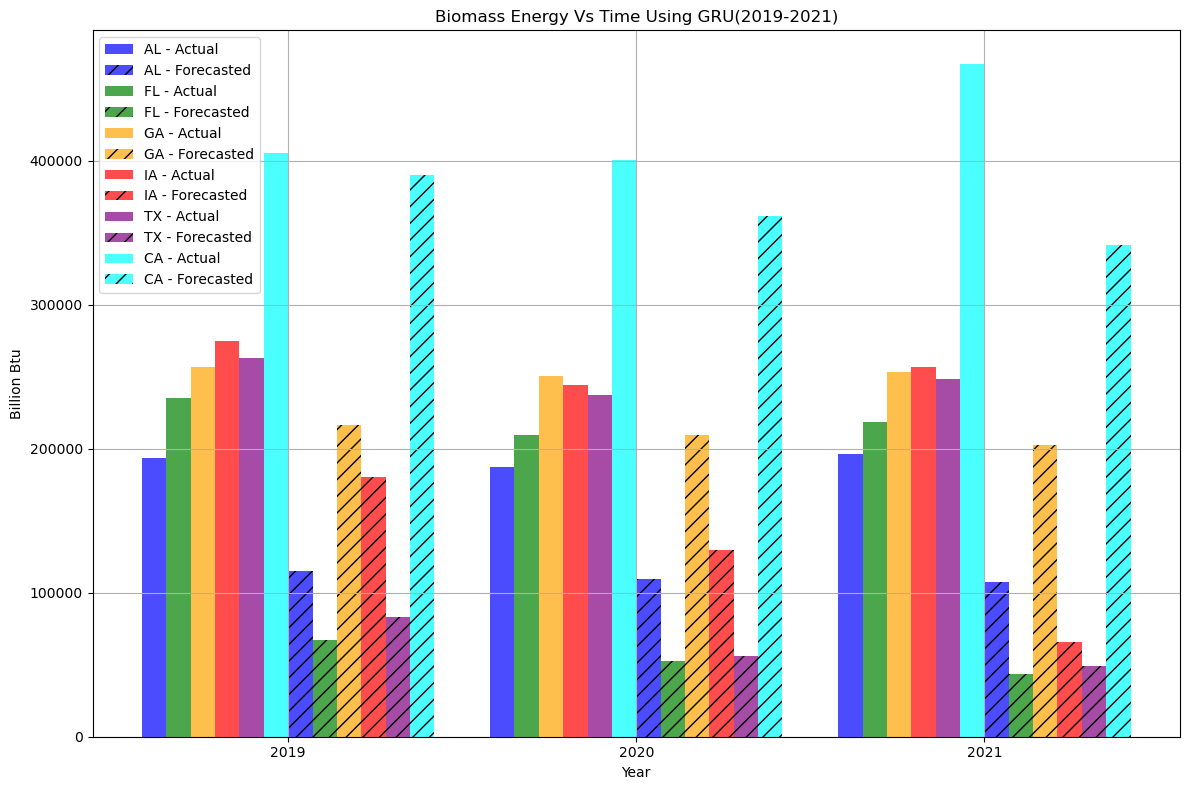

In [18]:
# list of state abbreviations 
state_abbreviations =  ['AL', 'FL', 'GA', 'IA', 'TX', 'CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Biomass_60_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.07

# colors for each state
state_colors = {'AL': 'blue', 'FL': 'green', 'GA': 'orange', 'IA': 'red', 'TX': 'purple', 'CA': 'cyan'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Biomass Energy Vs Time Using GRU(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### CNN

In [135]:
# sequence length and other parameters
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['AL', 'FL', 'GA', 'IA', 'TX', 'CA']:
    # Extract the data for the selected state
    data = Biomass.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # training data 
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Biomass.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 804ms/step
Epoch 1/20
23/23 [==============================] - 3s 6ms/step - loss: 0.1385
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0146
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 6/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 8/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 9/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 10/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 11/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 12/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0

32/32 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 2/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 3/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 4/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 5/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 7/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 8/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 9/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 10/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 11/20
33/33 [==============================] - 0s 5ms/step - loss: 0.00

42/42 [==============================] - 0s 6ms/step - loss: 9.2942e-04
Epoch 18/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 19/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 20/20
1/1 [==============================] - 0s 70ms/step
Epoch 1/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 2/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 3/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 4/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 5/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 6/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 7/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 8/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 9/20
43/43 [==============================] - 0s 5ms/step - loss: 

47/47 [==============================] - 0s 6ms/step - loss: 9.9292e-04
Epoch 17/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 18/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 19/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 20/20
1/1 [==============================] - 0s 79ms/step
Epoch 1/20
48/48 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 3/20
48/48 [==============================] - 0s 6ms/step - loss: 9.6474e-04
Epoch 4/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 5/20
48/48 [==============================] - 0s 6ms/step - loss: 9.4046e-04
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 7/20
48/48 [==============================] - 0s 5ms/step - loss: 9.0054e-04
Epoch 8/20
48/48 [==============================] - 0s 5ms/

52/52 [==============================] - 0s 5ms/step - loss: 7.3366e-04
Epoch 15/20
52/52 [==============================] - 0s 5ms/step - loss: 8.9014e-04
Epoch 16/20
52/52 [==============================] - 0s 5ms/step - loss: 9.2835e-04
Epoch 17/20
52/52 [==============================] - 0s 5ms/step - loss: 8.9040e-04
Epoch 18/20
52/52 [==============================] - 0s 6ms/step - loss: 9.8995e-04
Epoch 19/20
52/52 [==============================] - 0s 6ms/step - loss: 7.9052e-04
Epoch 20/20
1/1 [==============================] - 0s 74ms/step
Epoch 1/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 2/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 3/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 4/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 5/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 6/20
53/53 [==============================]

57/57 [==============================] - 0s 5ms/step - loss: 9.4901e-04
Epoch 11/20
57/57 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 12/20
57/57 [==============================] - 0s 5ms/step - loss: 9.5955e-04
Epoch 13/20
57/57 [==============================] - 0s 5ms/step - loss: 7.9810e-04
Epoch 14/20
57/57 [==============================] - 0s 5ms/step - loss: 7.9348e-04
Epoch 15/20
57/57 [==============================] - 0s 5ms/step - loss: 7.4762e-04
Epoch 16/20
57/57 [==============================] - 0s 5ms/step - loss: 7.7910e-04
Epoch 17/20
57/57 [==============================] - 0s 6ms/step - loss: 6.7653e-04
Epoch 18/20
57/57 [==============================] - 0s 5ms/step - loss: 6.9770e-04
Epoch 19/20
57/57 [==============================] - 0s 5ms/step - loss: 7.4408e-04
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
58/58 [==============================] - 0s 6ms/step - loss: 7.6221e-04
Epoch 2/20
58/58 [===========

1/1 [==============================] - 0s 63ms/step
Epoch 1/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 2/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 3/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 4/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 5/20
27/27 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 6/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 7/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 8/20
27/27 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 9/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 10/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 11/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 12/20
27/27 [==============================] - 0s 4ms/step - loss: 0.00

36/36 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 20/20
1/1 [==============================] - 0s 47ms/step
Epoch 1/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 2/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 4/20
37/37 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 5/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 6/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 7/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 9/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 10/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 11/20
37/37 [==============================] - 0s 5ms/step - loss: 0.00

46/46 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 18/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 19/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 20/20
1/1 [==============================] - 0s 47ms/step
Epoch 1/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 2/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 3/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 4/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 6/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 7/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 8/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 9/20
47/47 [==============================] - 0s 5ms/step - loss: 0.00

56/56 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 16/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 17/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 18/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 19/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
57/57 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 7/20
57/57 [==============================] - 0s 5ms/step - loss: 0.

26/26 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 11/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 12/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 13/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 14/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0192
Epoch 15/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0235
Epoch 16/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 17/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 18/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 19/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 20/20
1/1 [==============================] - 0s 47ms/step
Epoch 1/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 2/20
27/27 [==============================] - 0s 5ms/step - los

36/36 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 9/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 10/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 11/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 12/20
36/36 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 13/20
36/36 [==============================] - 0s 7ms/step - loss: 0.0096
Epoch 14/20
36/36 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 15/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 16/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 17/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 18/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 19/20
36/36 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 20/20
1/1 [==============================] - 0s

46/46 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 7/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 8/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 9/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 10/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 11/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 12/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 13/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 14/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 15/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 16/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 17/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 18/20
46/46 [==============================] - 0s

56/56 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 5/20
56/56 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 6/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 7/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 8/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 9/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 10/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 11/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 12/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 13/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 14/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 15/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 16/20
56/56 [==============================] - 0s 5

1/1 [==============================] - 0s 47ms/step
Epoch 1/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0130
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0145
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 8/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 9/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 10/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 11/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 12/20
26/26 [==============================] - 0s 5ms/step - loss: 0.01

35/35 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 19/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 20/20
1/1 [==============================] - 0s 51ms/step
Epoch 1/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 4/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 5/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 6/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 8/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 9/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 10/20
36/36 [==============================] - 0s 5ms/step - loss: 0.00

45/45 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 17/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 18/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 19/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 20/20
1/1 [==============================] - 0s 58ms/step
Epoch 1/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 2/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 3/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 4/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 5/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 6/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 7/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 8/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0

55/55 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 15/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 16/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 17/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 18/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 19/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 2/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 3/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 4/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 5/20
56/56 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 6/20
56/56 [==============================] - 0s 5ms/step - loss: 0

25/25 [==============================] - 0s 6ms/step - loss: 0.0200
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 11/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 12/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 13/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 14/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 15/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 16/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0274
Epoch 17/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0243
Epoch 18/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 19/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
26/26 [==============================] - 0s 6ms/step - lo

35/35 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 8/20
35/35 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 9/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 10/20
35/35 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 11/20
35/35 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 12/20
35/35 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 13/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 14/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 15/20
35/35 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 16/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 17/20
35/35 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 18/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0152
Epoch 19/20
35/35 [==============================] - 0

45/45 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 7/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 8/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 9/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 10/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 11/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 12/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 13/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 14/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 15/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 16/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 17/20
45/45 [==============================] - 0s 

55/55 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 4/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 5/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 6/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 7/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 8/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 9/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 10/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 11/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 12/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 13/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 14/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 15/20
55/55 [==============================] - 0s 6m

24/24 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0206
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0220
Epoch 11/20
25/25 [==============================] - 0s 5ms/step - loss: 0.02

34/34 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 18/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 19/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 5/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 6/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 7/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 8/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 9/20
35/35 [==============================] - 0s 2ms/step - loss: 0.01

44/44 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 16/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 17/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 18/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 19/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 3/20
45/45 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 14/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 15/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 16/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 17/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 18/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 19/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 20/20
1/1 [==============================] - 0s 36ms/step
Epoch 1/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 

### BAR GRAPH

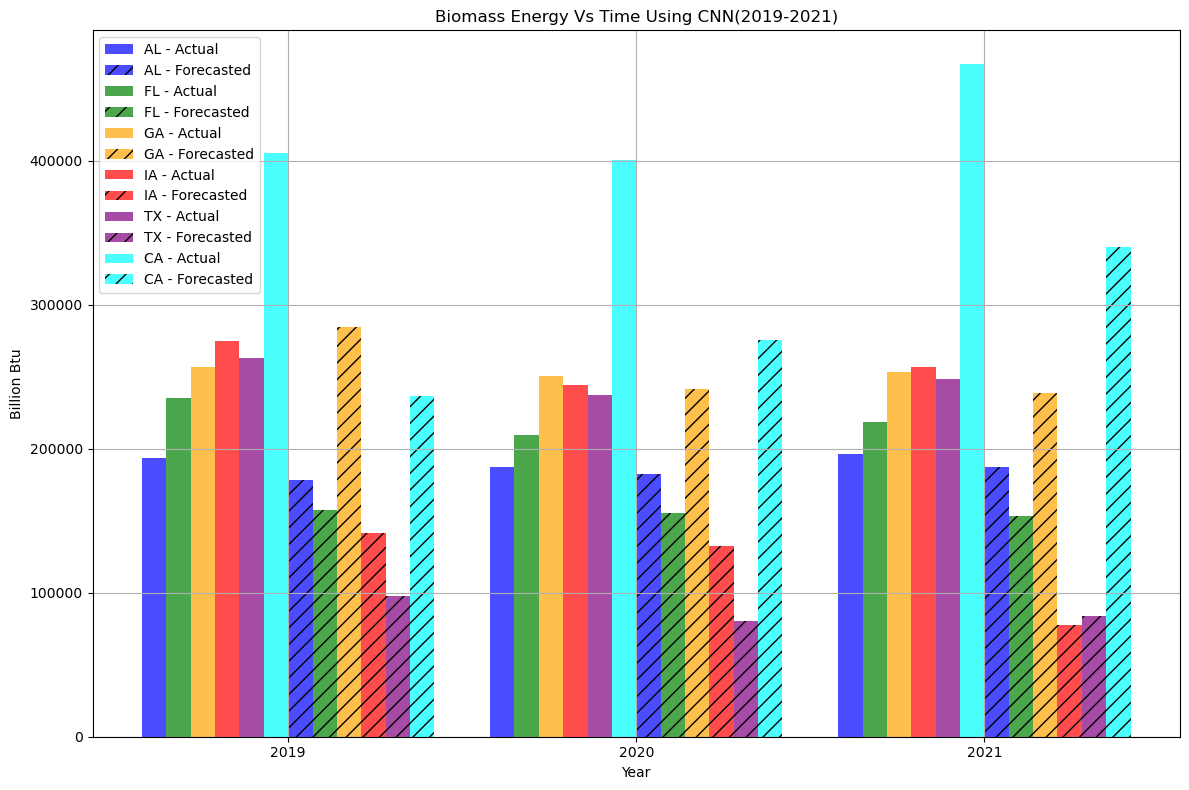

In [158]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Biomass_60_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.07 

# colors for each state
state_colors = {'AL': 'blue', 'FL': 'green', 'GA': 'orange', 'IA': 'red', 'TX': 'purple', 'CA': 'cyan'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Biomass Energy Vs Time Using CNN(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

## Machine Learning Forecasting 

### ARIMA

In [156]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['AL', 'FL', 'GA', 'IA', 'TX', 'CA']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Biomass.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

# Print the actual and forecasted values for each year and accuracy for each state
for state in selected_states:
    print(f"\n{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")


AL - Forecasted Values for 2022 and 2023:
2022: 233954.00
2023: 234249.42
Accuracy for AL (ARIMA) - 2019: 87.33%
Accuracy for AL (ARIMA) - 2020: 89.49%
Accuracy for AL (ARIMA) - 2021: 90.31

FL - Forecasted Values for 2022 and 2023:
2022: 233954.00
2023: 234249.42
Accuracy for FL (ARIMA) - 2019: 85.53%
Accuracy for FL (ARIMA) - 2020: 86.79%
Accuracy for FL (ARIMA) - 2021: 91.30

GA - Forecasted Values for 2022 and 2023:
2022: 233954.00
2023: 234249.42
Accuracy for GA (ARIMA) - 2019: 70.61%
Accuracy for GA (ARIMA) - 2020: 69.41%
Accuracy for GA (ARIMA) - 2021: 70.28

IA - Forecasted Values for 2022 and 2023:
2022: 233954.00
2023: 234249.42
Accuracy for IA (ARIMA) - 2019: 64.13%
Accuracy for IA (ARIMA) - 2020: 66.61%
Accuracy for IA (ARIMA) - 2021: 69.10

TX - Forecasted Values for 2022 and 2023:
2022: 233954.00
2023: 234249.42
Accuracy for TX (ARIMA) - 2019: 76.67%
Accuracy for TX (ARIMA) - 2020: 81.50%
Accuracy for TX (ARIMA) - 2021: 86.94

CA - Forecasted Values for 2022 and 2023:
20

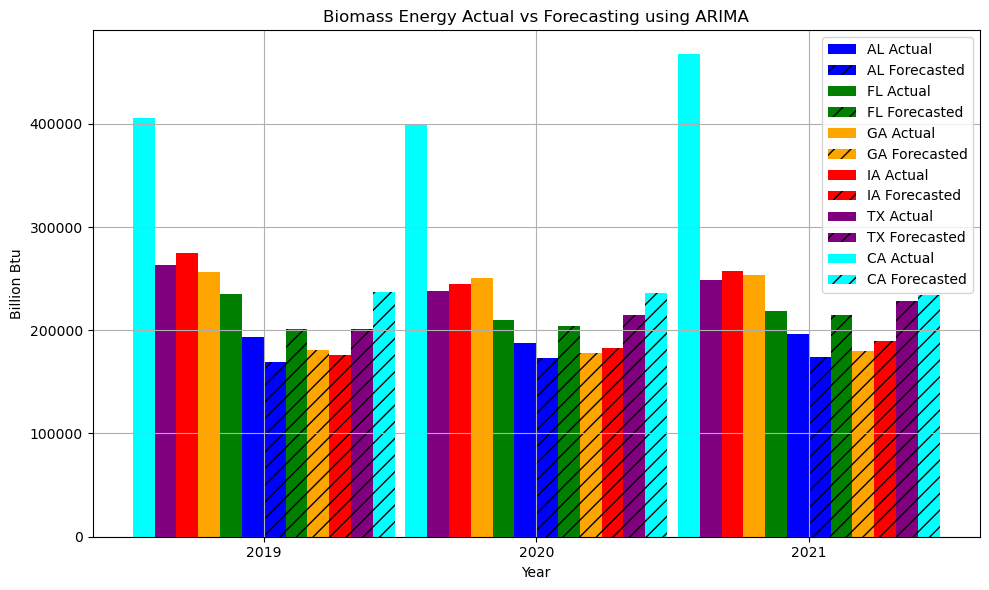

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# colors for each state
state_colors = {'AL': 'blue', 'FL': 'green', 'GA': 'orange', 'IA': 'red', 'TX': 'purple', 'CA': 'cyan'}

# Create a figure
plt.figure(figsize=(10, 6))

# width of the bars 
bar_width = 0.08
# space between bar groups
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Biomass.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# Add x-labels
plt.xlabel('Year')
# Add y-labels 
plt.ylabel('Billion Btu')
# Add title
plt.title('Biomass Energy Actual vs Forecasting using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
